# ASSIGNED Benzene pyrolysis

<b>This is an exam. You have to work alone on this problem. You are free to consult the book, your notes, the lecture notes, your homeworks and the posted solutions.</b>

Benzene reacts in a tubular reactor to form diphenyl and triphenyl:

1.  $2 C_6H_6 \rightleftharpoons C_{12}H_{10} + H_2$
2.  $C_6H_6 + C_{12}H_{10} \rightleftharpoons C_{18}H_{14} + H_2$

Let benzene be $B$, diphenyl be $D$, triphenyl be $T$ and hydrogen be $H$. The rates of these reactions are given as:
$r_1 = k_1(C_B^2 - \frac{C_D C_H}{K_1})$
$r_2 = k_2(C_B C_D - \frac{C_T C_H}{K_2})$
The following data is provided:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-right" />
</colgroup>
<tbody>
<tr>
<td class="org-left">k<sub>1</sub></td>
<td class="org-right">7 &times; 10<sup>5</sup> L/mol/hr</td>
</tr>


<tr>
<td class="org-left">K<sub>1</sub></td>
<td class="org-right">0.31</td>
</tr>


<tr>
<td class="org-left">k<sub>2</sub></td>
<td class="org-right">4 &times; 10<sup>5</sup> L / mol /hr</td>
</tr>


<tr>
<td class="org-left">K<sub>2</sub></td>
<td class="org-right">0.48</td>
</tr>
</tbody>
</table>

The reactor operates at 1033 K and 1 atm, with a feed of 60 kmol/hr of pure benzene.

## Explain in words why it may or may not be possible to achieve 50% conversion of benzene in this reaction

## Determine if it is possible to achieve 50% conversion of benzene and if so at what volume

## Find the volume that maximizes the production of diphenyl

Explain why there is a volume that maximizes the exit flow rate of diphenyl, and find that volume.

In [1]:
# Explanation here

In [1]:
# Code to find the volume here

## Solution

We have two reversible reactions with equilibrium constants that are less than one. That means it could be possible that the conversion is less than 50%. It is not obvious though, because benzene is a reactant in both reactions, so the combination may lead to a conversion greater than 50%.
To determine if we can get 50% conversion we have to solve the mole balances. We have multiple gas phase reactions, but no change in the total molar flow. We need mole balances on all the species because they all take part in the rate laws. 50% conversion means the exit flow of benzene will be 30 kmol/hr.

In [1]:
import numpy as np
from scipy.integrate import odeint

R = 0.082057338  # L atm / K / mol
T = 1033 # K
P = 1 # atm

Fb0 = 60e3 # mol/hr
Cb0 = P / R / T # mol / L
v0 = Fb0 / Cb0

k1 = 7e5
K1 = 0.31
k2 = 4e5
K2 = 0.48

def ode(F, V):
   C = F / v0
   Cb, Cd, Ct, Ch = C

   r1 = k1 * (Cb**2 - Cd * Ch / K1)
   r2 = k2 * (Cb * Cd - Ct * Ch / K2)

   dFbdV = -2 * r1 - r2
   dFddV = r1 - r2
   dFtdV = r2
   dFhdV = r1 + r2

   return [dFbdV, dFddV, dFtdV, dFhdV]

Here I manually adjust the volume to get an exit molar flow rate of B that is close to 30,000 mol/hr which is 50% conversion. There are many ways to do this, but this one is simple.

F_{b,exit} = 30065.3331336528 mol/hr at a volume of 400.0 L

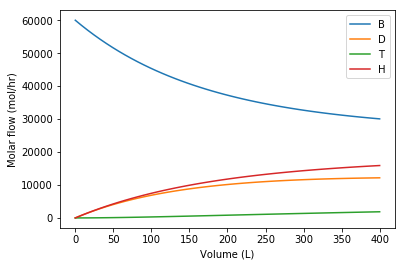

In [1]:
F0 = [Fb0, 0, 0, 0]
Vspan = np.linspace(0, 400)
sol = odeint(ode, F0, Vspan)

Fb, Fd, Ft, Fh = sol.T
print('F_{{b,exit}} = {} mol/hr at a volume of {} L'.format(Fb[-1], Vspan[-1]))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(Vspan, sol)
plt.xlabel('Volume (L)')
plt.ylabel('Molar flow (mol/hr)')
plt.legend(['B', 'D', 'T', 'H'])

We expect there could be a maximum because diphenyl is produced in reaction one, and consumed in reaction two. It is not obvious there has to be a maximum though. It depends on how fast diphenyl is produced in reaction one, and how fast the equilibrium in reaction two is achieved. k1 is larger than k2, so we anticipate that it is produced quickly, and the approach to equilibrium in reaction 2 is slow. So, we will see a maximum. To find the maximum we have to first solve the mole balances up to a volume that shows a maximum. Then, we use argmax to estimate it.

The maximum in Fd is 12283.311620725528 at a volume of 489.7959183673469 L

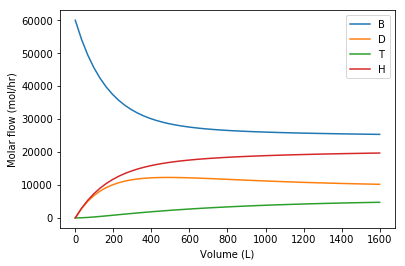

In [1]:
F0 = [Fb0, 0, 0, 0]
Vspan = np.linspace(0, 1600)
sol = odeint(ode, F0, Vspan)

Fb, Fd, Ft, Fh = sol.T

imax = np.argmax(Fd)
print('The maximum in Fd is {} at a volume of {} L'.format(Fd[imax], Vspan[imax]))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(Vspan, sol)
plt.xlabel('Volume (L)')
plt.ylabel('Molar flow (mol/hr)')
plt.legend(['B', 'D', 'T', 'H'])

Note the volume you get is sensitive to the final volume you use and the number of points used in your solution.